# <center>Diamonds</center>
<center>aka, the "Sarah gets a diamond" dataset (Kinda, maybe. But probably not.)<center>

----


## The Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle("../data/diamonds.pkl")

---

## How this started

Years ago, I was tooling around on either the [UVA Darden Graduate School of Business](https://www.darden.virginia.edu/) or the [Harvard Business School](https://www.hbs.edu/Pages/default.aspx) website and came across a dataset called "Sarah gets a diamond". Apparently, it's a fairly well known dataset amongst the MBA crowd and you can still [find it for sale](https://hbsp.harvard.edu/product/UV0869-PDF-ENG) on the web.

I saved it for future use because I thought it was easily graspable and pretty good for a regression model. I also thought this was the dataset but I don't think it is now because that dataset says it has the prices for 6000 diamonds and this is considerably more at 219,704 rows.

If you're interested in developing a bit of domain knowledge, the [history of how diamonds are graded](https://www.thediamondauthority.org/the-diamond-grading-system/) is interesting but, unlike the links for the terms below which are of immediate relevance, I recommend you read it later.

## Background information to get you talking like an expert in no time

### Rather than go though all the details for all the columns, I'll sumeraize and provide links
* `clarity` refers the amount of inclusions (i.e., [internal flaws](https://4cs.gia.edu/en-us/diamond-clarity/)) in the diamonds. [Fewer and smaller are better](https://www.diamonds.pro/education/clarity/) though this often takes a jewelers loupe.
 * `cut` refers the [GIA Cut Grading System](https://www.gemsociety.org/article/gias-new-diamond-cut-grading-system/) which was developed in 2005 and is de facto standard. 
 * `color` Clear diamonds are graded D-Z. The [higher letters more yellowish](https://www.lumeradiamonds.com/diamond-education/diamond-color) but are [often better values](https://www.diamonds.pro/education/color/) since color is hard to determine by itself.
 * `polish` and `symmetry` are what you would expect.
 * `eye-clean` refers to the blemishes or inclusions can see with a the naked eye. [There are 10 grades](https://www.diamonds.pro/education/eye-clean-diamonds/).
 * `culet_size` is the size of the circle you'd see if you looked straight down. [None is ideal](https://www.diamonds.pro/education/diamond-culet/) because it affects the amount of light that gets reflected. 
 * `fancy_color_` columns have to do with colored diamonds. Formerly, extremely rare but now common, popular and almost always lab grown.
 * `fluor` columns refer to the effect of long wave UV light. [According to GIA](https://4cs.gia.edu/en-us/blog/understanding-diamond-fluorescence/) 25-35% have it; for ~10% of those it's noticeable to an expert.
 * `lab` is the grading lab. The big three are GIA, IGI and HRD . Each diamond gets a lab certificate that [looks like this](https://www.i-diamants.com/en/diamond-certificates-gia-igi-hrd.html,00026).
 * `shape` refers to one of the 10 or so most [common diamond cuts](https://www.lumeradiamonds.com/diamond-education/diamond-shape). This dataset has an additional one called the 'Cushion Modified'.
![Diamond_shapes.png](attachment:Diamond_shapes.png)

### The 4Cs -- the main variables that determine value, according to the diamond industry:
# <center>Cut, Color, Clarity, and Caret Weight</center>

## Preliminary EDA

### For the categorical variables, how much variety is there and what does it mean?


####  Should it be needed, here's the code for the values of each column:

```
col_list = ['color', 'clarity', 'cut', 'symmetry','polish','lab','eye_clean', 'culet_size', 'lab','shape',
            'fancy_color_intensity','fancy_color_dominant_color','fancy_color_secondary_color',
            'fancy_color_overtone', 'fluor_color', 'fluor_intensity',]
            
for col in col_list:
    print(f" '{col}' has the following values: \n \t {df[col].unique()} \n")
```

#### The only column that is of any concern is the size column which looks to have a huge amount of outliers.

### Getting a sense of the numeric data

In [3]:
df.shape

(219704, 25)

#### I found a few things interesting here:

In [4]:
df.describe()

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,2.197040e+05
mean,0.755176,61.683794,57.747579,5.548867,5.135623,3.285698,6.908035e+03
std,0.845892,9.915251,9.959906,1.763932,1.374527,2.054817,2.595944e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


#### Comparing the mean, the median, and the 75% we see this is heavily skewed both with lots of small diamonds but also with few large and expensive stones.

#### It turns out there are a number of large diamonds and that they're mostly evenly dispersed in size.

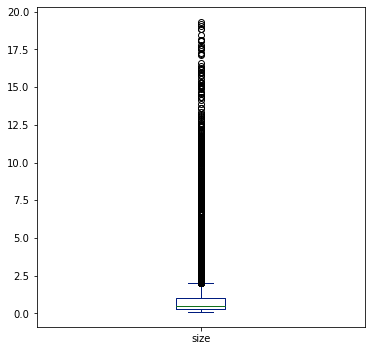

In [5]:
sns.set_palette(palette='dark', n_colors=14)
df['size'].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))
plt.show()

### Outliers are normally defined as:
<br>

<center>${\big [}Q_{1}-k(Q_{3}-Q_{1}), Q_{3}+k(Q_{3}-Q_{1}){\big ]}$ </center>

But, in this case there are some reasons why not to remove outliers. Namely, the data isn't likely to be due an error in collection, and it's not clear if the outliers will affect the model results or not. Some estimators are highly sensitive to outliers; others aren't.

In this case the wisest choice will be to run models both ways.

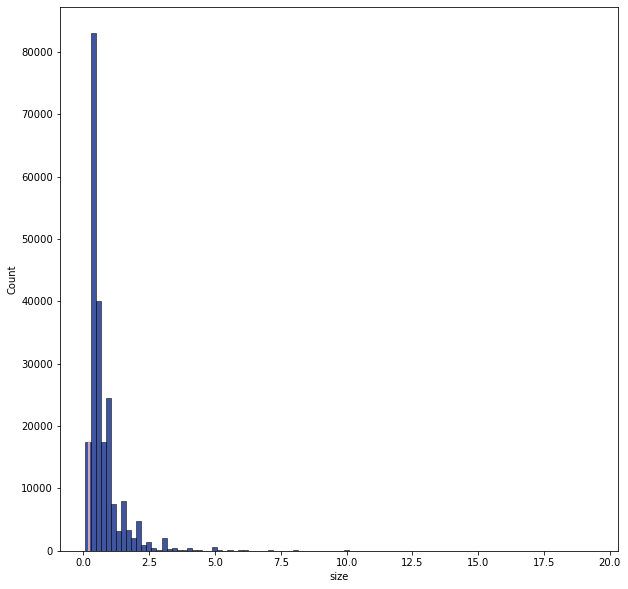

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data=df, x="size", bins=100)
plt.axvline(.2, 0.0, 0.2,  c='pink')

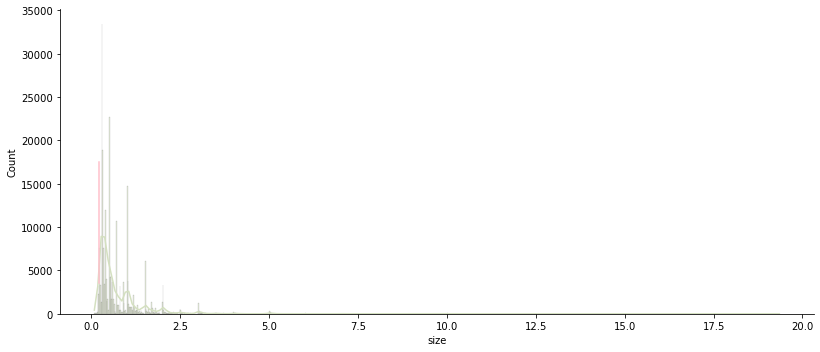

In [7]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=14)

sns.displot(data=df, x="size", kde=True, aspect=2.3)
plt.axvline(.2, 0.1, 0.5,  c='pink')

##### Oh, that's skewed. That's _really_ skewed. That's like a F distribution. Let's look at it a different way.

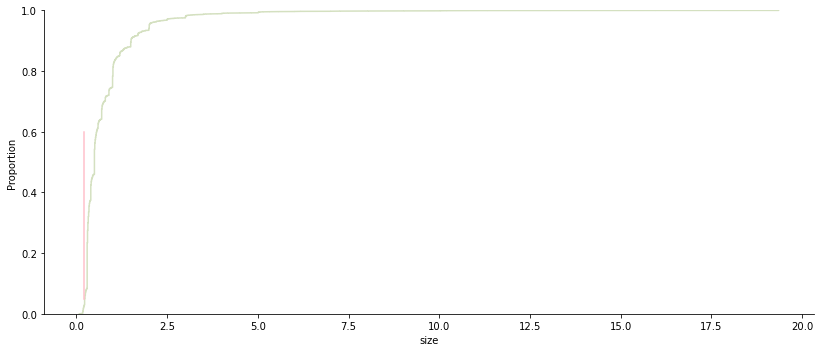

In [8]:
sns.displot(df, x="size", aspect=2.3,  kind="ecdf")
plt.axvline(.2, 0.05, 0.6, c='pink')

Well, that hypothesis was rejected! Additionally, [this lady](https://slate.com/human-interest/2013/01/dear-prudence-is-my-engagement-ring-diamond-too-small.html) has a 1/6 carat stone. Admittedly, it's an N of 1 but this is a world-wide market and not just a US market.

You would there there would be some stones we could rule out. The smallest size `df['size'].min()` is .08 carets and if we take everything at `df.loc[df['size'] <= .2]` and below that only 4805 rows. If we went with stones that were slightly smaller at .15 carat as the floor we could eliminate 263 rows.

##### But the real answer, at least for the lower end, is best found statistically and, from the box and whiskers in Cell 5 above, there aren't any outliers at the lower end. 

##### but what about the upper end? Do I really have to have all of these? like, who the heck is going to have a 18 carat ring?

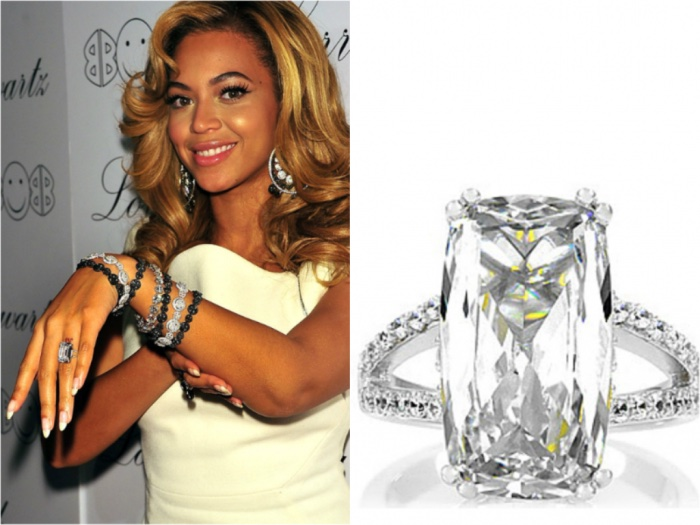

##### Oh, her. Wow. That's ... quite impressive.

---

## EDA

Sticking with the Cut, Color, Clarity, and Caret Weight order above ...

### Cut

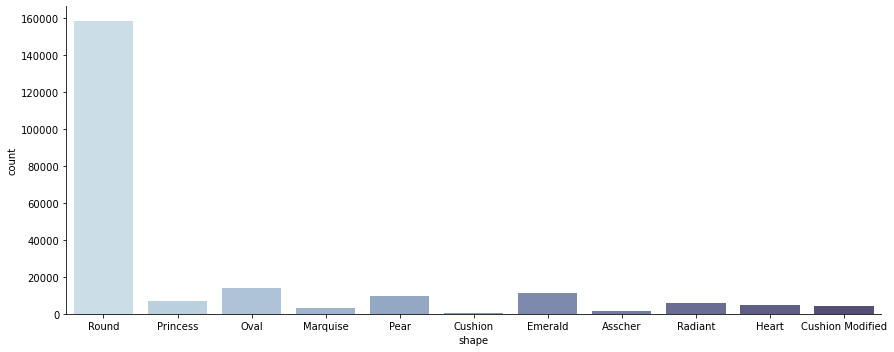

In [9]:
sns.set_palette(palette="ch:s=.25,rot=-.25", n_colors=14)
shapes = ['Round', 'Princess', 'Oval', 'Marquise', 'Pear', 'Cushion', 'Emerald', 'Asscher', 'Radiant', 'Heart', 'Cushion Modified']
sns.catplot(x='shape', data=df, kind='count', order = shapes, aspect=2.5)


#df['shape'].value_counts()

Here's that graphic again to help in visulalizeing the shapes
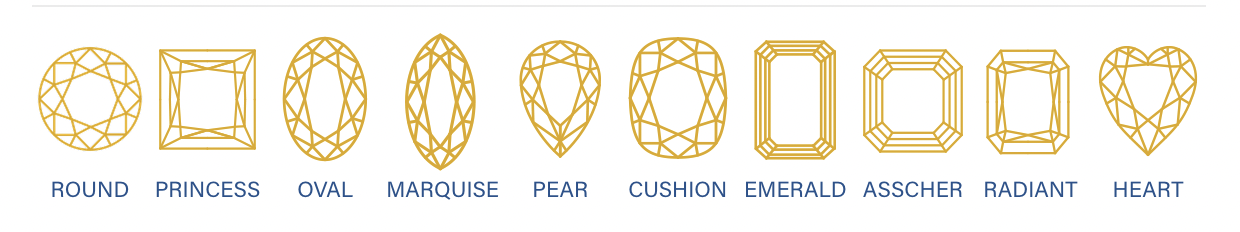

In [10]:
print(f"Round diamonds are {round(160000/219704*100, 1)}% of all diamonds in the set")

Round diamonds are 72.8% of all diamonds in the set


In [11]:
values = df['shape'].value_counts()
labels = df['shape'].unique().tolist()

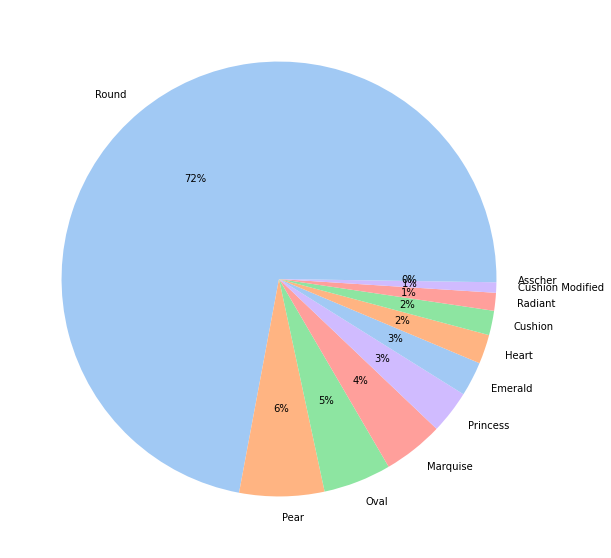

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

colors = sns.color_palette('pastel')[0:5]
#create pie chart
ax.pie(values, labels=labels, colors=colors, autopct='%.0f%%',)
plt.show()

### Color

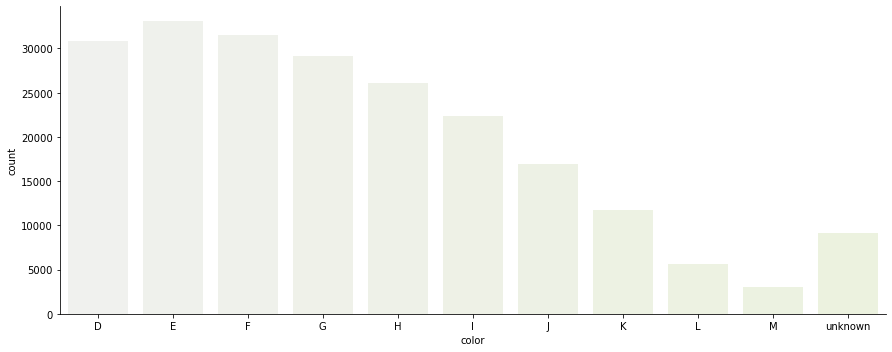

In [25]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'unknown']
sns.catplot(x='color', data=df, kind='count', order=colors, aspect=2.5)

#df['color'].value_counts()d

I just want to point out that getting the column colors to mimic the diamond colors by color grade is not particularly easy.

### Clarity

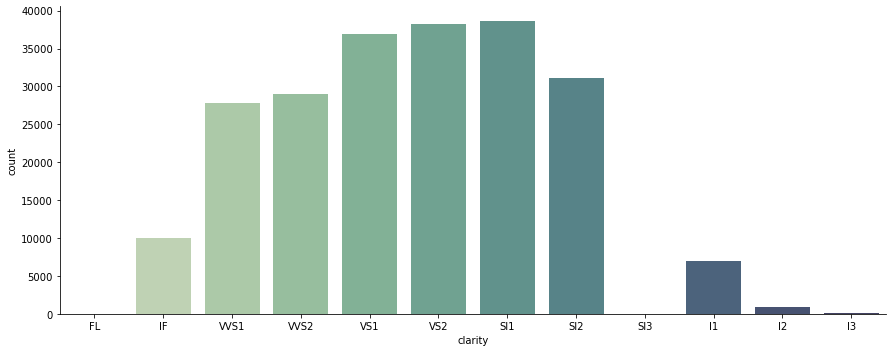

In [32]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=14)

clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3']
sns.catplot(x='clarity', data=df, kind='count', order=clarities, aspect=2.5)

#df['clarity'].value_counts()

**Next iteration though EDA** -- group the clarity ratings (e.g., VS1-VS2 or I1-I3),  and see what, if anything, we notice from plotting the results against, carat weight and color.

### Carat weight

#### I noticed this concided with a fairly large number of highly flawed diamonds and hypothesized they might be [melee diamonds](https://4cs.gia.edu/en-us/blog/melee-diamonds-tiny-diamonds-big-impact/)? which are .2 carat or less but would hard to tell since they're both small and colored. That is everything in the column with the pink line in the first chart and or to the left and beneath the pink lines in the 2nd and 3rd charts. 

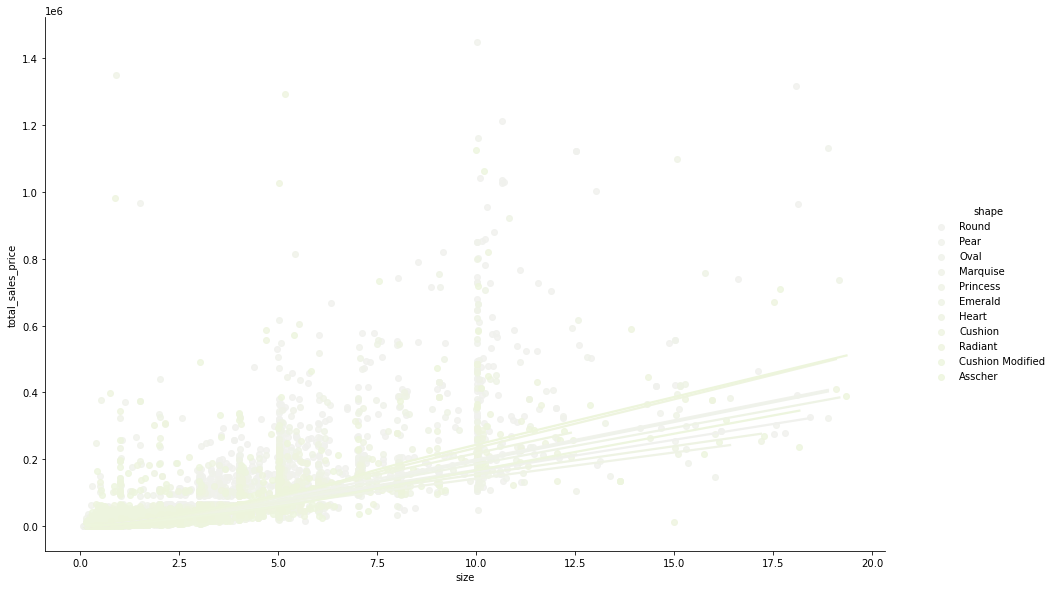

In [28]:
f=sns.lmplot(x="size", y="total_sales_price",  hue="shape", data=df, lowess=True,aspect = 2)
f.figure.set_size_inches(15, 9)

#### The interesting thing in this chart is how there several vertical lines that represent common carat weight sizes.
and there is also seems to be a price breakpoint at around $10000 which is even more clear for the chart below.

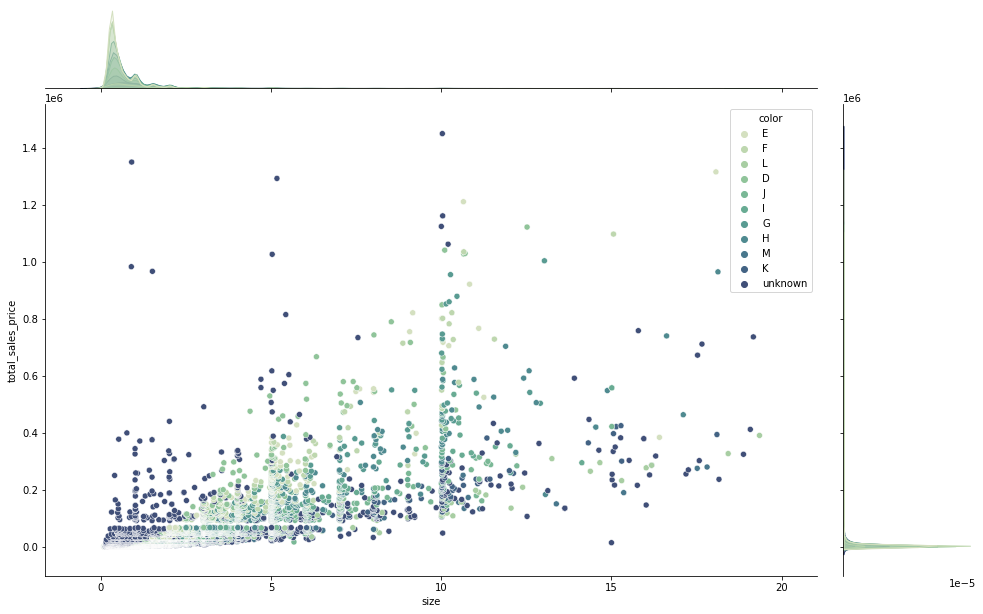

In [33]:
g= sns.jointplot(data=df, x="size", y="total_sales_price", hue="color")
g.figure.set_size_inches(15, 9)




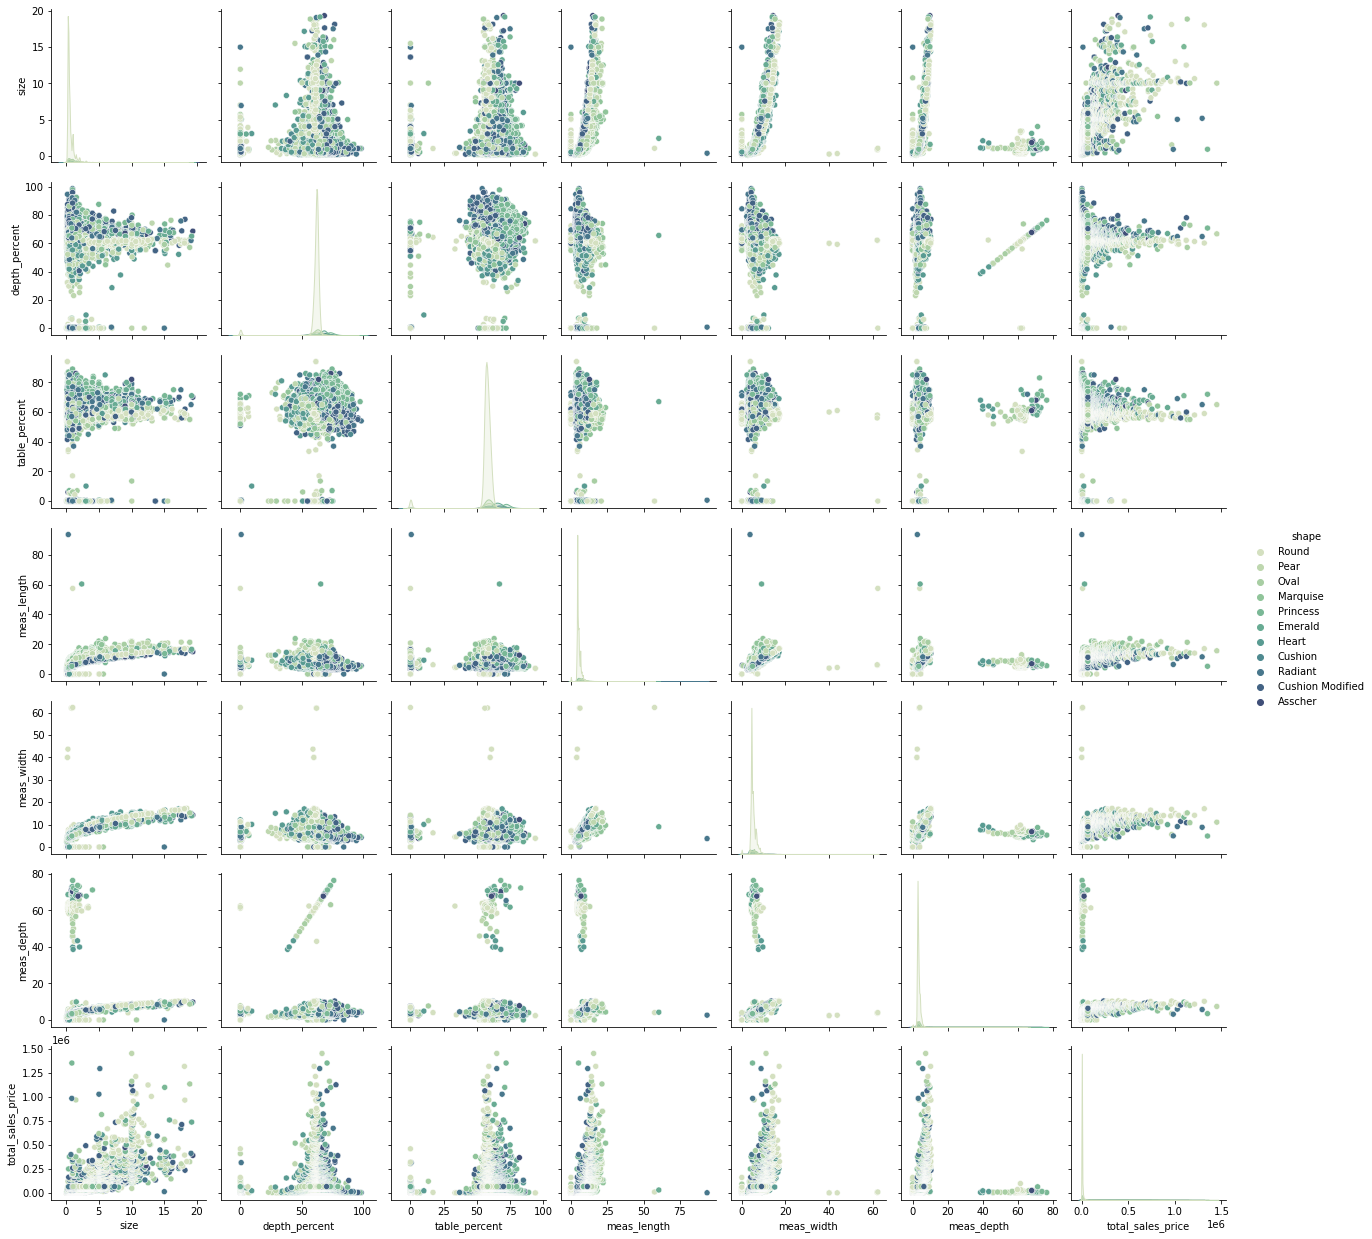

In [34]:
sns.pairplot(df, hue='shape', height=2.5)

This isn't showing all the columns and definitely not what I need. It's interesting though.

### Combination related questions

1. Are melee sized colored diamonds uncommon? It seems like they would be hard to see.

In [31]:
colored = df.loc[df['fancy_color_dominant_color'] != 'unknown' ]
sm_colored = colored.loc[df['size'] <= .2 ].reindex()
sm_colored

,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean
7708,Round,0.19,unknown,Yellow,unknown,None,Fancy,VVS1,Excellent,Very Good,...,2.26,TN,STK,unknown,unknown,unknown,None,IGI,616,unknown
7709,Round,0.19,unknown,Yellow,unknown,None,Fancy,SI1,Very Good,Very Good,...,2.27,STK,TK,unknown,unknown,unknown,None,IGI,616,unknown
7710,Round,0.19,unknown,Yellow,unknown,None,Fancy Light,VS2,Excellent,Very Good,...,2.25,VTN,M,unknown,unknown,unknown,None,IGI,616,unknown
7711,Round,0.19,unknown,Yellow,unknown,None,Fancy,VVS2,Very Good,Very Good,...,2.26,STK,TK,unknown,unknown,unknown,None,IGI,616,unknown
7712,Round,0.19,unknown,Yellow,unknown,None,Fancy,VS2,Excellent,Excellent,...,2.23,M,STK,unknown,unknown,unknown,None,IGI,616,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,Pear,0.20,unknown,Pink,unknown,unknown,Fancy,SI2,unknown,Good,...,1.96,TK,XTK,unknown,Pointed,unknown,Faint,GIA,16200,unknown
200035,Emerald,0.15,unknown,Pink,unknown,unknown,Fancy Intense,VS1,unknown,Good,...,1.58,M,VTK,N,unknown,unknown,Faint,GIA,16200,unknown
204086,Radiant,0.20,unknown,Blue,unknown,unknown,Fancy,VS1,unknown,Good,...,1.78,unknown,unknown,N,Pointed,unknown,None,GIA,18000,Yes
205701,Cushion Modified,0.20,unknown,Green,unknown,unknown,Fancy Intense,SI2,unknown,Very Good,...,2.11,M,XTK,unknown,Pointed,unknown,None,GIA,19800,unknown


It makes sense to drill down on a few of these. 10 carat stones are the best case

In [54]:
ten_car = df.loc[df['size'] == .2].reindex()
not_rnd_ten_car = ten_car.loc[df['shape'] != 'Round'].reindex()

,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean
1514,Emerald,0.2,F,unknown,unknown,unknown,unknown,VS1,unknown,Very Good,...,2.01,unknown,unknown,unknown,unknown,unknown,None,GIA,500,unknown
1926,Emerald,0.2,E,unknown,unknown,unknown,unknown,VS1,unknown,Very Good,...,1.93,unknown,unknown,unknown,unknown,unknown,None,GIA,514,unknown
2778,Oval,0.2,E,unknown,unknown,unknown,unknown,VS1,unknown,Very Good,...,2.07,unknown,unknown,unknown,unknown,unknown,Strong,GIA,470,unknown
3108,Emerald,0.2,D,unknown,unknown,unknown,unknown,VVS2,unknown,Very Good,...,2.04,unknown,unknown,unknown,unknown,unknown,Faint,GIA,540,unknown
3251,Pear,0.2,E,unknown,unknown,unknown,unknown,SI2,unknown,Very Good,...,1.97,unknown,unknown,unknown,unknown,unknown,None,GIA,544,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194855,Cushion Modified,0.2,unknown,Pink,unknown,unknown,Fancy Deep,SI2,unknown,Good,...,2.22,M,XTK,unknown,Pointed,unknown,Faint,GIA,12600,unknown
194863,Oval,0.2,unknown,Pink,unknown,unknown,Fancy Deep,VS2,unknown,Good,...,2.10,VTK,XTK,unknown,Pointed,unknown,Faint,GIA,12600,unknown
200026,Pear,0.2,unknown,Pink,unknown,unknown,Fancy,SI2,unknown,Good,...,1.96,TK,XTK,unknown,Pointed,unknown,Faint,GIA,16200,unknown
204086,Radiant,0.2,unknown,Blue,unknown,unknown,Fancy,VS1,unknown,Good,...,1.78,unknown,unknown,N,Pointed,unknown,None,GIA,18000,Yes


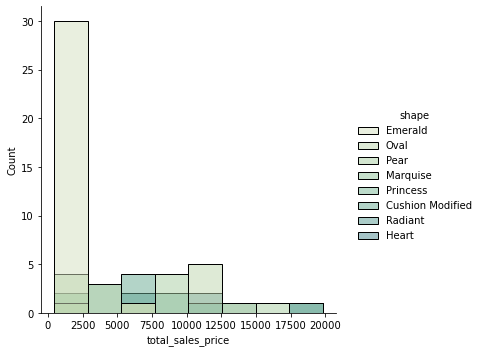

In [60]:

sns.displot(data=not_rnd_ten_car, x="total_sales_price", hue="shape")


## Here's my hypothesis: Size is the main driver.

I don't think people really care about color because they really can't see it easily. Cuts I think are a matter of perference. A bad cut condition might have some negative impact but I don't think it will be much because there shouldn't be that many and the others could be concealed by the setting.

Also, I'm  putting my money on a boosted model like `XGBoost`.

I read that a 1 carat diamond costs range between [1800 and 12000](https://www.diamonds.pro/education/1-carat-diamond-ring/) dollars.

In [ ]:
sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="total_sales_price", hue="size",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.set_xticks([500, 1000, 2000, 5000, 10000])



Notes for next round --

PCA is in order
Run models with outliers removed
Colinearity is obviously in play. Deal with that.